# Homework #2
## Submitted by: Anton Morozov
## Due: October 19, 23:59

### 1. Read the description of the problem and identify your input and output variables. Load the data using pandas and split the data frame into X (inputs) and y (outputs).

In [1]:
import pandas as pd  # Load all necessary libraries
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import LabelEncoder as Enc

/Users/antonmorozov/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
col_names = ['ID','Age','Education','Gender','Country','Ethnicity', 
             'Nscore', 'Escore', 'Oscore','Ascore','Cscore',
             'Impulsive','SS',
             'Alcohol','Ampthet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df = pd.read_csv('drug_consumption.csv', header = None, index_col = 0, names = col_names)  # or with data.columns
X, y = df.iloc[:,:12], df.iloc[:, 12:].apply(Enc().fit_transform)  # split the data frame into X (inputs) and y (outputs). 

### X - inputs of responder's demographics, y - outputs of each drugs responses

In [3]:
df.reset_index(drop = True, inplace = True)  # fix indexes
df.head(-1)

,Age,Education,Gender,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
df.shape

(1885, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Age          1885 non-null float64
Education    1885 non-null float64
Gender       1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Ampthet      1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object
LSD          1885 non-null obje

In [6]:
df.isnull().sum()

Age          0
Education    0
Gender       0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Ampthet      0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### X and y

In [7]:
X.head()

,Age,Education,Gender,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
ID,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [8]:
y.head()

,Alcohol,Ampthet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,
1,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
2,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
3,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
4,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
5,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


### 2. Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation.

In [9]:
df.isnull().any()  # isnull - checks NaN, any - for each column

Age          False
Education    False
Gender       False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Ampthet      False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

### Convert CL0 and CL1 (used over a decade ago) as "never used", rest to "used'

In [10]:
y_used_or_not = df.iloc[:,12:]
y_used_or_not.head()

,Alcohol,Ampthet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [11]:
# df_drugs["Alcohol"] = df_drugs.Alcohol.map({"CL0":0, "CL1":1, "CL2":1, "CL3":1, "CL4":1, "CL5":1, "CL6":1}) too long

y_used_or_not.replace(['CL0','CL1'],[0,0], inplace = True)
y_used_or_not.replace(['CL2', 'CL3', 'CL4', 'CL5', 'CL6'],[1, 1, 1, 1, 1], inplace = True)

In [12]:
y_used_or_not.head()

,Alcohol,Ampthet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0


### 3. Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice.

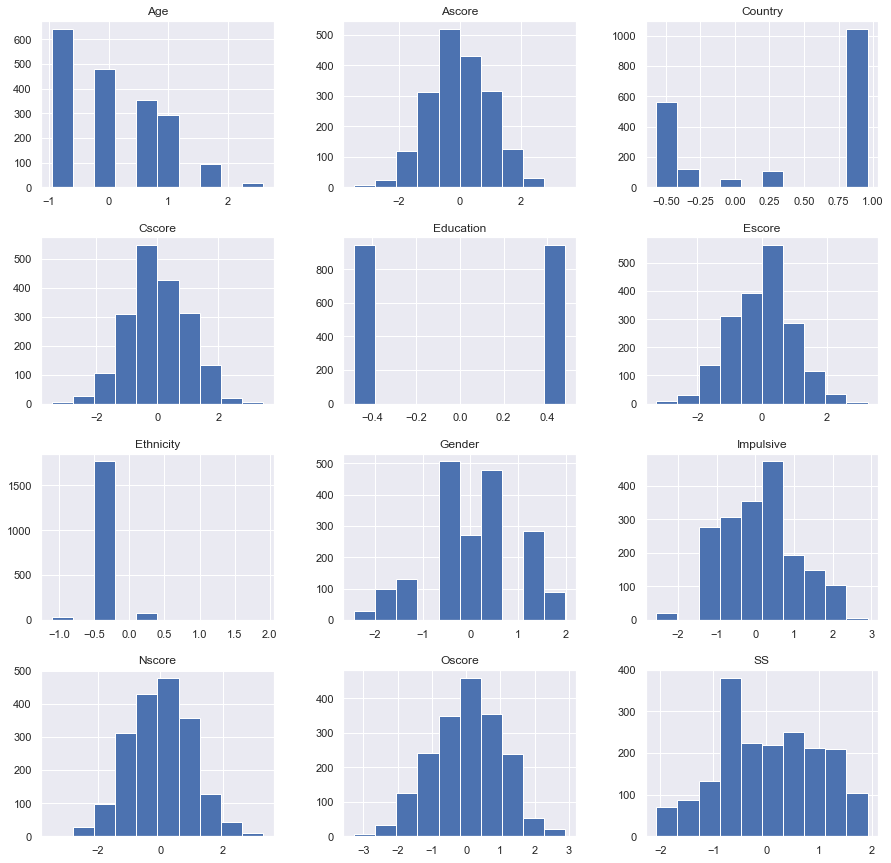

In [13]:
x_features = ['Age','Education','Gender','Country','Ethnicity', 
             'Nscore', 'Escore', 'Oscore','Ascore','Cscore',
             'Impulsive','SS']
X[x_features].hist(figsize = (15, 15));

### Y with 0 to 6 classification

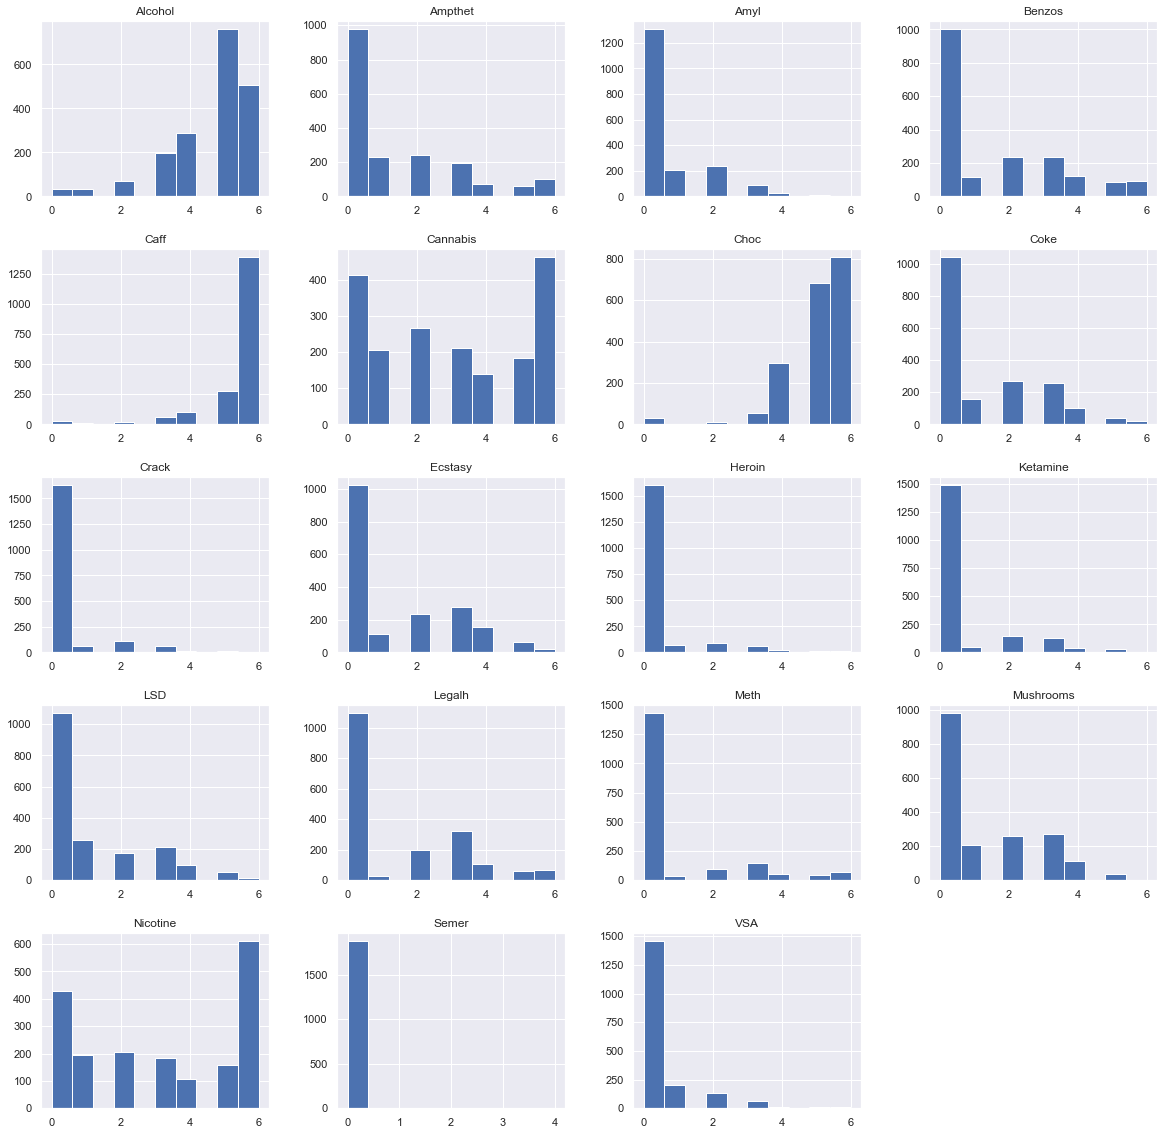

In [14]:
y_features = ['Alcohol','Ampthet', 'Amyl','Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
y[y_features].hist(figsize = (20, 20));

### Y using 0 to 1 classification

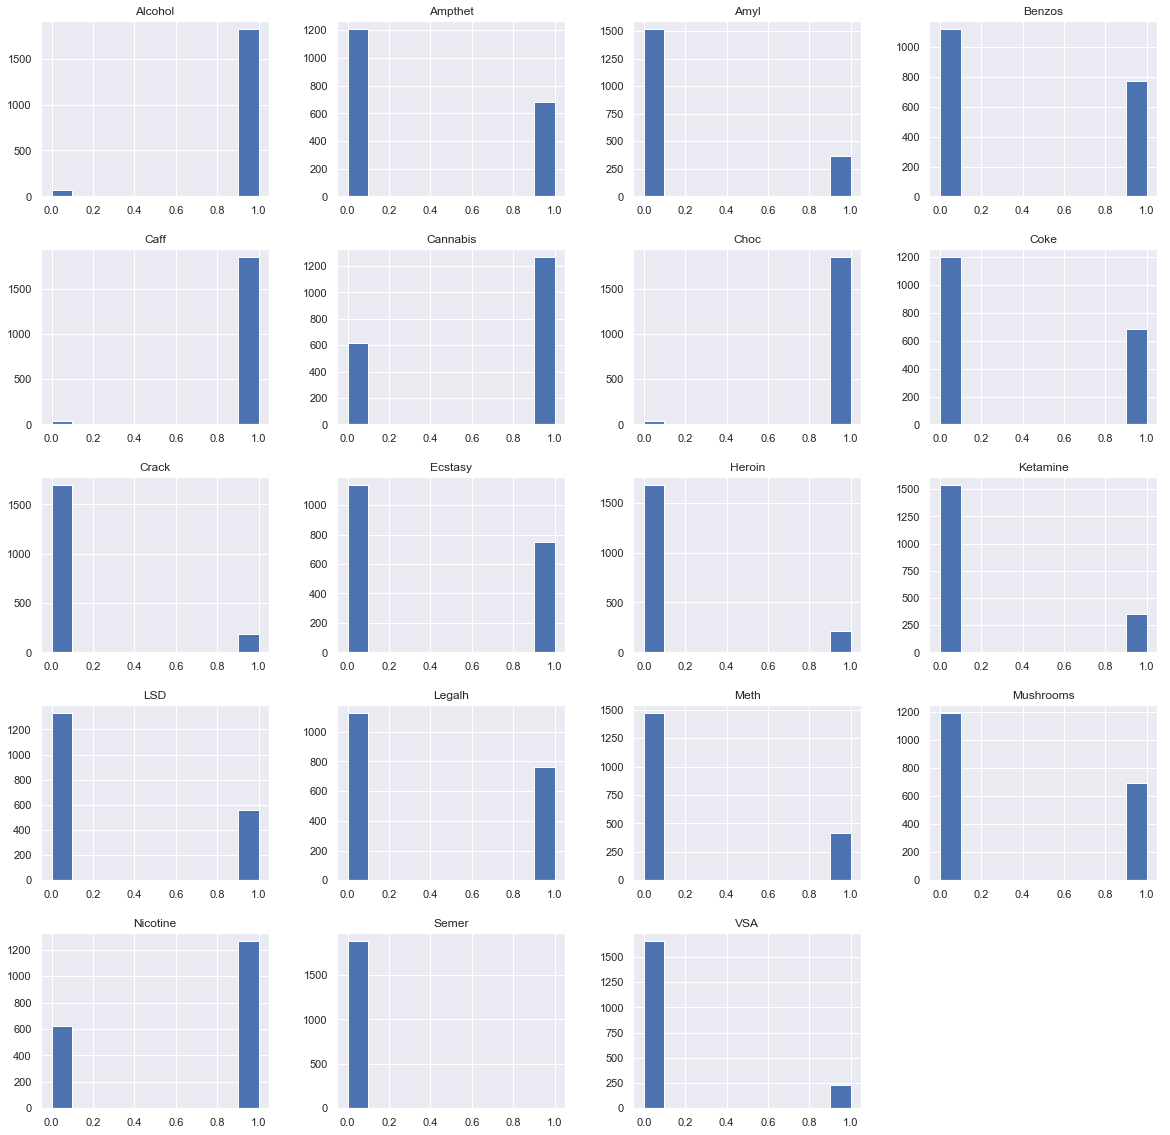

In [15]:
y_features_binary = ['Alcohol','Ampthet', 'Amyl','Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
y_used_or_not[y_features_binary].hist(figsize = (20, 20));  

### Heatmap for X

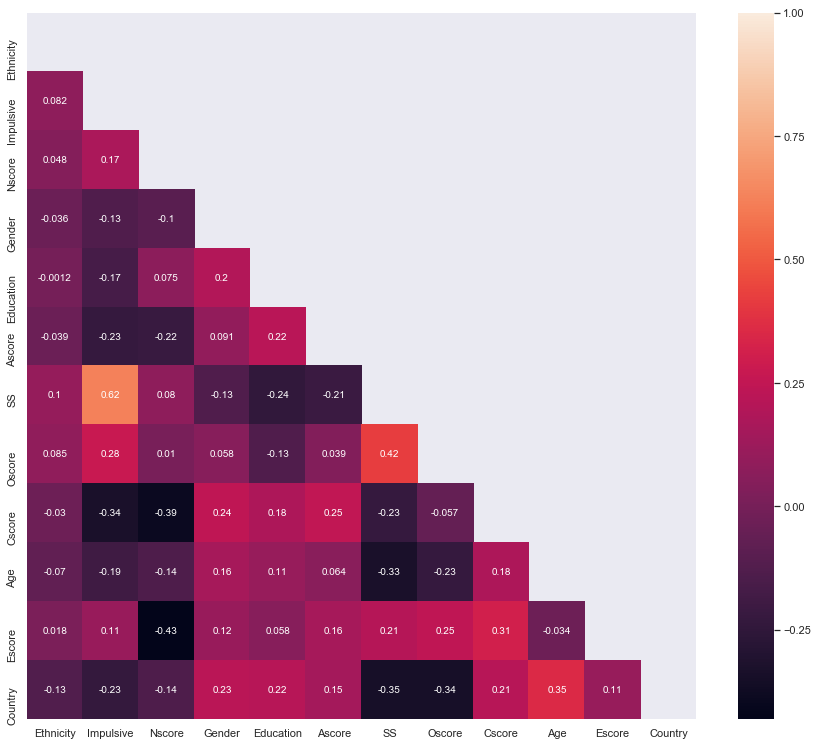

In [16]:
numerical_X = list(set(X.columns))

corr_mat_X = X[numerical_X].corr()
mask_X = np.zeros_like(corr_mat_X)
plt.subplots(figsize=(15,13))
mask_X[np.triu_indices_from(mask_X)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_mat_X, mask = mask_X, annot = True);

#### No distinctive correlations for X

### Heatmap for Y

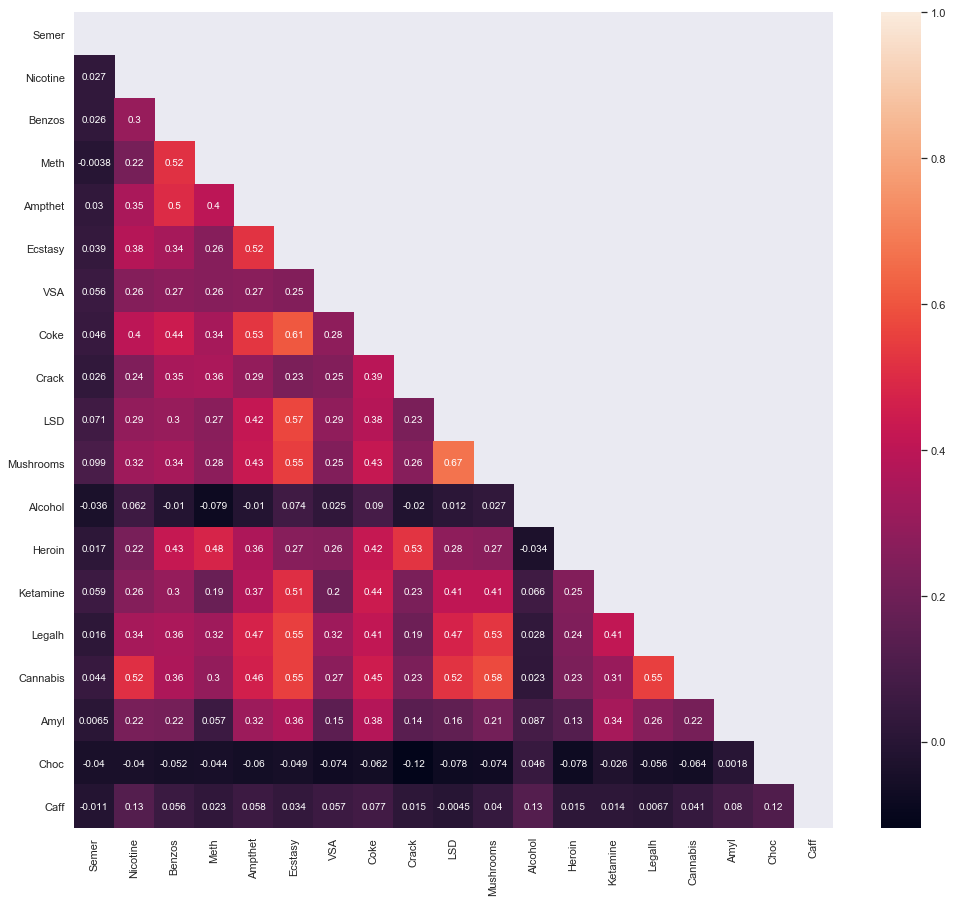

In [17]:
numerical = list(set(y.columns))

corr_mat = y[numerical].corr()
mask = np.zeros_like(corr_mat)
plt.subplots(figsize=(17,15))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_mat, mask = mask, annot = True);

### Classify Drugs Based on the Graphs

#### From the graphs, we can see that most drugs are never used except Alcohol, Caffeine, Cannabis, Choc, and Nicotine (write down conclusions)

In [18]:
y_used_or_not_fixed = y_used_or_not.drop(['Choc','Semer','Caff','Alcohol'], axis = 1)

#### Non Binary

In [19]:
y_hard = y[['Amyl','Crack','Heroin','Ketamine','VSA','Meth']]
y_medium  = y[['Ampthet','Benzos','Coke','Ecstasy','Mushrooms','LSD','Legalh']]
y_light = y[['Cannabis','Nicotine']]
y_extra_light = y[['Alcohol','Caff','Choc']]

#### Binary

In [20]:
yb_hard = y_used_or_not[['Amyl','Crack','Heroin','Ketamine','VSA','Meth']]
yb_medium  = y_used_or_not[['Ampthet','Benzos','Coke','Ecstasy','Mushrooms','LSD','Legalh']]
yb_light = y_used_or_not[['Cannabis','Nicotine']]
yb_extra_light = y_used_or_not[['Alcohol','Caff','Choc']]

#### Get Dummies (Additional)

In [21]:
y_dummie = pd.get_dummies(y, dummy_na = False, columns=['Alcohol','Ampthet','Amyl', 'Benzos', 'Caff', 'Cannabis', 
                                               'Choc', 'Coke', 'Crack', 'Ecstasy', 
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], sparse = True)
y_dummie.head()

,Alcohol_0,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,Alcohol_5,Alcohol_6,Ampthet_0,Ampthet_1,Ampthet_2,...,Semer_2,Semer_3,Semer_4,VSA_0,VSA_1,VSA_2,VSA_3,VSA_4,VSA_5,VSA_6
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### 4. Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction.

### (Multiclass) Classification with KNearest Neighbors

In [22]:
yb = [yb_hard, yb_medium, yb_light, yb_extra_light]

In [23]:
yb_list = list()
for i in yb:
    clfk = KNeighborsClassifier()
    clfk.fit(X, i)
    yb_list.append(clfk.score(X, i))
print(yb_list)

[0.5687002652519894, 0.4217506631299735, 0.6859416445623342, 0.9347480106100796]


In [24]:
print(sum(yb_list)/len(yb_list))
# Average of 4 scores were taken

0.6527851458885943


#### The above procedure was based on the multiclass y, but it's complex and biased because yb_hard, yb_medium, yb_light, yb_extra_light were classified based on the graphs. Let's do y for each drug:

In [25]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('LDiscriminant', LinearDiscriminantAnalysis()))
models.append(('KNeighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('Random Forests', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))

In [26]:
mean_f1 = {}
mean_accuracy = {}
for j in models:
    summ_f1 = 0
    summ_a = 0
    print('\n','    ', j[0], '\n')
    for c in y_used_or_not_fixed.columns:  # !!! Choc, Semer, Caff, Alcohol are removed
        y_each = y_used_or_not_fixed[c]
        X_train, X_test, y_train, y_test = train_test_split(X, y_each, train_size = 0.3, shuffle = True, random_state = 42)
        clfk = j[1]
        clfk.fit(X_train, y_train)  # Fit on train set & estimate F1 on the test set
        y_pred = clfk.predict(X_test)
        a1s = accuracy_score(y_test,y_pred)
        f1s = f1_score(y_test, y_pred)  # for test
        summ_f1 += f1s
        summ_a += a1s
        print(c,': F1 is {:.3f}. Accuracy is {:.3f} \n'.format(f1s, a1s))
    mean_f1[j[0]] = summ_f1/y_used_or_not.shape[1]
    mean_accuracy[j[0]] = summ_a/y_used_or_not.shape[1]
    print('Mean F1:', mean_f1[j[0]], end='\n\n')
    print('Mean Accuracy:', mean_accuracy[j[0]], end='\n\n')


      Logistic Regression 

Ampthet : F1 is 0.570. Accuracy is 0.709 

Amyl : F1 is 0.105. Accuracy is 0.807 

Benzos : F1 is 0.617. Accuracy is 0.702 

Cannabis : F1 is 0.868. Accuracy is 0.820 

Coke : F1 is 0.493. Accuracy is 0.683 

Crack : F1 is 0.014. Accuracy is 0.892 

Ecstasy : F1 is 0.655. Accuracy is 0.740 

Heroin : F1 is 0.147. Accuracy is 0.886 

Ketamine : F1 is 0.015. Accuracy is 0.807 

Legalh : F1 is 0.744. Accuracy is 0.793 

LSD : F1 is 0.638. Accuracy is 0.789 

Meth : F1 is 0.441. Accuracy is 0.792 

Mushrooms : F1 is 0.651. Accuracy is 0.759 

Nicotine : F1 is 0.810. Accuracy is 0.723 

VSA : F1 is 0.114. Accuracy is 0.870 

Mean F1: 0.36220479586407267

Mean Accuracy: 0.6196172248803828


      LDiscriminant 

Ampthet : F1 is 0.580. Accuracy is 0.708 

Amyl : F1 is 0.099. Accuracy is 0.808 

Benzos : F1 is 0.618. Accuracy is 0.699 

Cannabis : F1 is 0.861. Accuracy is 0.815 

Coke : F1 is 0.496. Accuracy is 0.680 

Crack : F1 is 0.014. Accuracy is 0.892 

Ecsta

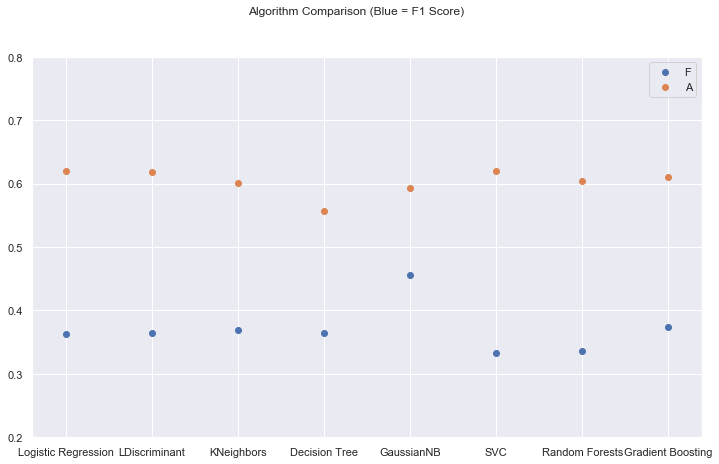

In [27]:
plt.figure(figsize = (12,7))
plt.suptitle('Algorithm Comparison (Blue = F1 Score)')
plt.xticks(range(0,8,1))
plt.scatter(list(mean_f1.keys()),list(mean_f1.values()));
plt.scatter(list(mean_accuracy.keys()),list(mean_accuracy.values()))
plt.legend("FA")
plt.yticks(np.arange(0.2, 0.8, 0.1));

### KFold

#### With Accuracy Metrics

In [29]:
mean1 = {}
for j in models:
    print('       ', j[0])
    summ1 = 0
    for c in y_used_or_not_fixed.columns:
        kfold = KFold(n_splits = 5)  # 5-fold CV
        cv = kfold.split(X, y_used_or_not_fixed[c])  # show data & make the split
        clf = j[1]  # LogisticRegression()
        scores1 = cross_val_score(clf, X, y_used_or_not_fixed[c], scoring = 'accuracy', cv=cv)
        print('KFold Score '+c+' : {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))
        summ1 += scores1.mean()
    mean1[j[0]] = summ1 / y_used_or_not_fixed.shape[1]
    print('Mean:', mean1[j[0]], end='\n\n')

        Logistic Regression
KFold Score Ampthet : 0.868 ± 0.086
KFold Score Amyl : 0.868 ± 0.086
KFold Score Benzos : 0.868 ± 0.086
KFold Score Cannabis : 0.868 ± 0.086
KFold Score Coke : 0.868 ± 0.086
KFold Score Crack : 0.868 ± 0.086
KFold Score Ecstasy : 0.868 ± 0.086
KFold Score Heroin : 0.868 ± 0.086
KFold Score Ketamine : 0.868 ± 0.086
KFold Score Legalh : 0.868 ± 0.086
KFold Score LSD : 0.868 ± 0.086
KFold Score Meth : 0.868 ± 0.086
KFold Score Mushrooms : 0.868 ± 0.086
KFold Score Nicotine : 0.868 ± 0.086
KFold Score VSA : 0.868 ± 0.086
Mean: 0.7864898320070733

        LDiscriminant
KFold Score Ampthet : 0.868 ± 0.086
KFold Score Amyl : 0.868 ± 0.086
KFold Score Benzos : 0.868 ± 0.086
KFold Score Cannabis : 0.868 ± 0.086
KFold Score Coke : 0.868 ± 0.086
KFold Score Crack : 0.868 ± 0.086
KFold Score Ecstasy : 0.868 ± 0.086
KFold Score Heroin : 0.868 ± 0.086
KFold Score Ketamine : 0.868 ± 0.086
KFold Score Legalh : 0.868 ± 0.086
KFold Score LSD : 0.868 ± 0.086
KFold Score Meth :

#### With Roc_Auc Metrics

In [30]:
mean = {}
for j in models:
    print('       ', j[0])
    summ = 0
    for c in y_used_or_not_fixed.columns:
        kfold = KFold(n_splits = 5)  # 5-fold CV
        cv = kfold.split(X, y_used_or_not_fixed[c])  # show data & make the split
        clf = j[1]  # LogisticRegression()
        scores = cross_val_score(clf, X, y_used_or_not_fixed[c], scoring = 'roc_auc', cv=cv)
        print('KFold Score '+c+' : {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))
        summ += scores.mean()
    mean[j[0]] = summ / y_used_or_not_fixed.shape[1]
    print('Mean:', mean[j[0]], end='\n\n')

        Logistic Regression
KFold Score Ampthet : 0.725 ± 0.062
KFold Score Amyl : 0.687 ± 0.043
KFold Score Benzos : 0.701 ± 0.050
KFold Score Cannabis : 0.844 ± 0.054
KFold Score Coke : 0.703 ± 0.051
KFold Score Crack : 0.716 ± 0.051
KFold Score Ecstasy : 0.769 ± 0.057
KFold Score Heroin : 0.763 ± 0.044
KFold Score Ketamine : 0.716 ± 0.066
KFold Score Legalh : 0.815 ± 0.057
KFold Score LSD : 0.796 ± 0.062
KFold Score Meth : 0.738 ± 0.080
KFold Score Mushrooms : 0.770 ± 0.065
KFold Score Nicotine : 0.727 ± 0.045
KFold Score VSA : 0.793 ± 0.076
Mean: 0.7508736632500176

        LDiscriminant
KFold Score Ampthet : 0.724 ± 0.063
KFold Score Amyl : 0.686 ± 0.044
KFold Score Benzos : 0.701 ± 0.051
KFold Score Cannabis : 0.843 ± 0.054
KFold Score Coke : 0.703 ± 0.052
KFold Score Crack : 0.711 ± 0.051
KFold Score Ecstasy : 0.767 ± 0.059
KFold Score Heroin : 0.758 ± 0.046
KFold Score Ketamine : 0.714 ± 0.065
KFold Score Legalh : 0.812 ± 0.060
KFold Score LSD : 0.795 ± 0.065
KFold Score Meth :

### Algorithm Comparison with KFold

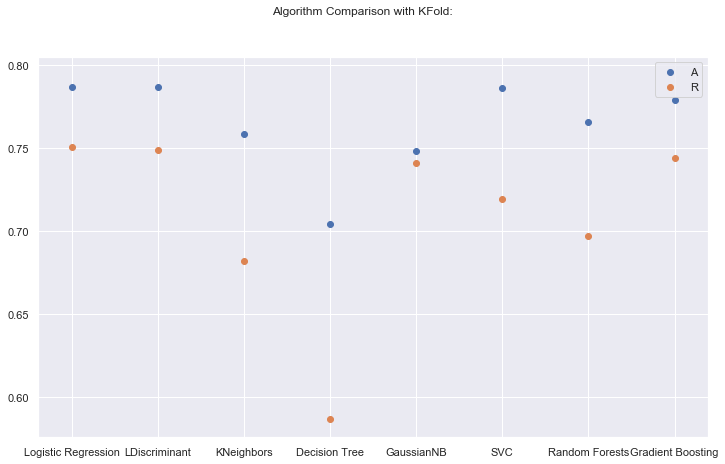

In [31]:
plt.figure(figsize = (12,7))
plt.suptitle('Algorithm Comparison with KFold:')
plt.scatter(list(mean1.keys()), list(mean1.values()))
plt.scatter(list(mean.keys()), list(mean.values()))
plt.legend("AR");

#### Supplementary Analysis for Classifiers

In [32]:
cross_v = pd.DataFrame(columns=y_used_or_not_fixed.columns)
cross_v['Models'] = np.array(models)[:, 0]
cross_v = cross_v.set_index('Models')
for j in models:
    for c in y_used_or_not_fixed.columns:
        kfold = KFold(n_splits = 5)
        cv = kfold.split(X, y_used_or_not_fixed[c])
        scores3 = cross_val_score(j[1], X, y_used_or_not_fixed[c], scoring='accuracy', cv=cv)
        cross_v[c][j[0]] = scores3.mean()
cross_v

,Ampthet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Models,,,,,,,,,,,,,,,
Logistic Regression,0.712997,0.801061,0.692838,0.809019,0.691777,0.898143,0.746419,0.885411,0.811671,0.78992,0.793103,0.794164,0.767109,0.725729,0.877984
LDiscriminant,0.71565,0.8,0.69496,0.801592,0.691777,0.898143,0.74695,0.888064,0.811671,0.78939,0.795756,0.792042,0.770292,0.725199,0.878515
KNeighbors,0.696021,0.785146,0.653581,0.775066,0.659416,0.885942,0.709284,0.870027,0.778249,0.754377,0.771353,0.787268,0.717772,0.675862,0.856233
Decision Tree,0.615385,0.703979,0.617507,0.734748,0.608488,0.827056,0.656764,0.814324,0.728912,0.692308,0.708223,0.732095,0.670557,0.632361,0.814854
GaussianNB,0.708753,0.703979,0.693899,0.784615,0.67374,0.813793,0.725729,0.797878,0.722546,0.77931,0.788859,0.758621,0.757029,0.707692,0.805305
SVC,0.707162,0.803714,0.701857,0.805305,0.693369,0.898674,0.741645,0.887533,0.814324,0.788859,0.793103,0.792573,0.762865,0.725199,0.877984
Random Forests,0.670557,0.785146,0.661538,0.790451,0.65305,0.893899,0.701857,0.875862,0.795225,0.764987,0.761804,0.787798,0.729443,0.693899,0.860477
Gradient Boosting,0.708223,0.795225,0.693369,0.801061,0.687003,0.887003,0.72679,0.87321,0.802653,0.784615,0.791512,0.794164,0.761273,0.711936,0.861538


### Improve the Best Classifier with GridSearchCV

In [37]:
Hyperparametrs = {}
for c in y_used_or_not_fixed.columns:
    y_each = y_used_or_not_fixed[c]
    X_train, X_test, y_train, y_test = train_test_split(X, y_each, train_size = 0.3, shuffle = True, random_state = 42)
    clr = GridSearchCV(LogisticRegression(), param_grid={'C':np.arange(0.1, 1, 0.1), 
                                                         'max_iter':np.arange(1, 10, 1), 'class_weight': [None, 'balanced']},
                       #'multi_class': ['ovr', 'multinomial', 'auto']},
                       cv=5, scoring = 'f1_weighted')
    clr.fit(X_train, y_train)
    Hyperparametrs[c] = clr.best_params_
    print(c, end='                      \r')

In [38]:
Hyperparametrs

{'Ampthet': {'C': 0.6, 'class_weight': 'balanced', 'max_iter': 2},
 'Amyl': {'C': 0.7000000000000001, 'class_weight': None, 'max_iter': 4},
 'Benzos': {'C': 0.2, 'class_weight': 'balanced', 'max_iter': 1},
 'Cannabis': {'C': 0.8, 'class_weight': None, 'max_iter': 3},
 'Coke': {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1},
 'Crack': {'C': 0.4, 'class_weight': None, 'max_iter': 4},
 'Ecstasy': {'C': 0.7000000000000001,
  'class_weight': 'balanced',
  'max_iter': 4},
 'Heroin': {'C': 0.8, 'class_weight': None, 'max_iter': 5},
 'Ketamine': {'C': 0.2, 'class_weight': None, 'max_iter': 1},
 'LSD': {'C': 0.5, 'class_weight': None, 'max_iter': 3},
 'Legalh': {'C': 0.30000000000000004, 'class_weight': None, 'max_iter': 2},
 'Meth': {'C': 0.1, 'class_weight': None, 'max_iter': 2},
 'Mushrooms': {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1},
 'Nicotine': {'C': 0.30000000000000004, 'class_weight': None, 'max_iter': 2},
 'VSA': {'C': 0.1, 'class_weight': None, 'max_iter': 4}}

In [56]:
cross_v = pd.DataFrame(columns=y_used_or_not_fixed.columns)
cross_v['Models'] = ['LogisticRegression']
cross_v = cross_v.set_index('Models')

for c in Hyperparametrs:
    a = Hyperparametrs[c]
    kfold = KFold(n_splits=5)
    cv = kfold.split(X, y_used_or_not_fixed[c])
    scores = cross_val_score(LogisticRegression(C=a['C'], class_weight=a['class_weight'], max_iter=a['max_iter']),
                             X, y_used_or_not_fixed[c], scoring='accuracy', cv=cv)
    cross_v[c]['LogisticRegression'] = scores.mean()

In [57]:
cross_v

,Ampthet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Models,,,,,,,,,,,,,,,
LogisticRegression,0.714058,0.800531,0.701326,0.809549,0.682759,0.897613,0.744828,0.885942,0.812732,0.790451,0.793103,0.798939,0.764987,0.725199,0.877984


In [58]:
cross_v.mean(axis = 1)

Models
LogisticRegression    0.786667
dtype: float64

In [ ]:
# VS  0.7508736632500176

### 5. Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion.

### According to the results, our classifier (Logistic Regression) with improved parameters showed that it can predict each drug consumption with an average accuracy of 78.6%. The best prediction was performed for crack (89.8%) while the worst one was for coke (68.3%). 
### In conclusion, the data was divided into inputs X and outputs y at the beginning. X was consisted of 12 different demographic parameters  for each responder, while y was a set of 19 drugs. Then, y values were converted into numeric values from 0 to 6. After that, 0 and 1 values were assigned to zero meaning a responder had never used a particular drug, while 2 to 6 meant that a drug was used. The data was visualized then, and several features for y were dropped: Choc, Semer, Caff, Alcohol.
### After the dataset was preprocessed, 8 different classifiers were tested with K-fold cross validation and with roc (receiver operating characteristic) and with accuracy metric. In addition, F1 score metric was added for the data split test. After comparing the classifiers, the LogisticRegression was chosen as the optimal one. At the end, hyper parameters were chosen for the classifier for each drug.

### Overall, that ML could be used in identifying if a person is succeptible to a particular drug based on his or her personal and demographic characteristics. The tool could be greatly used in the medical industries